# Mounting the drive to Runtime environment

Importing Libraries

In [1]:
import numpy as np
from google.colab import drive
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


Data Preprocessing

Train data and validation data is for training the model

Test data is for evaluating final tunned model

##Training image preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_Vegetable_detection/train',
    labels="inferred", # images are placed in a driectory formet in Drive
    label_mode="categorical", # he labe is the name of the fruit / Vegetables
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


Validation image Preprocessing

In [3]:
validation_set = keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_Vegetable_detection/validation',
    labels="inferred", # images are placed in a driectory formet in Drive
    label_mode="categorical", # he labe is the name of the fruit / Vegetables
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 351 files belonging to 36 classes.


In [4]:
validation_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 36), dtype=tf.float32, name=None))>

## Buliding the Model and convolution Layer

In [5]:
cnn = tf.keras.models.Sequential()

# this snippet creates an instance of the sequential model.
#using keras API from tensorflorw

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Flatten())

In [9]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))


In [10]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))


In [11]:
cnn.add(tf.keras.layers.Dropout(0.5))

# that 36 indicated the number of classes in the output layer

In [12]:
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))



In [13]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 256)       0         
 g2D)                                                   

## Compilation and Training

In [14]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=30,shuffle=True,)

Epoch 1/30
98/98 [==============================] - 47s 441ms/step - loss: 10.4081 - accuracy: 0.0392 - val_loss: 3.4431 - val_accuracy: 0.0627
Epoch 2/30
98/98 [==============================] - 33s 318ms/step - loss: 3.4322 - accuracy: 0.0626 - val_loss: 3.4449 - val_accuracy: 0.0997
Epoch 3/30
98/98 [==============================] - 24s 232ms/step - loss: 3.3596 - accuracy: 0.0677 - val_loss: 3.1095 - val_accuracy: 0.1368
Epoch 4/30
98/98 [==============================] - 24s 231ms/step - loss: 3.2122 - accuracy: 0.0928 - val_loss: 2.8453 - val_accuracy: 0.1994
Epoch 5/30
98/98 [==============================] - 24s 230ms/step - loss: 3.0938 - accuracy: 0.1339 - val_loss: 2.6937 - val_accuracy: 0.2735
Epoch 6/30
98/98 [==============================] - 24s 231ms/step - loss: 2.8921 - accuracy: 0.1843 - val_loss: 2.4252 - val_accuracy: 0.3390
Epoch 7/30
98/98 [==============================] - 25s 236ms/step - loss: 2.7106 - accuracy: 0.2446 - val_loss: 2.1750 - val_accuracy: 0.458

In [16]:
model_save_path = '/content/drive/MyDrive/Fruit_Vegetable_detection/Trained_Model_Fruits_30.h5'

cnn.save(model_save_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
training_history.history

{'loss': [10.408133506774902,
  3.4321911334991455,
  3.359567165374756,
  3.2122292518615723,
  3.093837261199951,
  2.8921382427215576,
  2.710578441619873,
  2.4732441902160645,
  2.2109413146972656,
  1.9875874519348145,
  1.8141722679138184,
  1.5622104406356812,
  1.3566474914550781,
  1.285818338394165,
  1.1079580783843994,
  1.0048998594284058,
  0.8623483180999756,
  0.7829497456550598,
  0.7925713062286377,
  0.8174529671669006,
  0.6414758563041687,
  0.6048106551170349,
  0.5821689367294312,
  0.5430423617362976,
  0.6127986311912537,
  0.4910717010498047,
  0.4531729519367218,
  0.35764801502227783,
  0.448772668838501,
  0.38078510761260986],
 'accuracy': [0.039165329188108444,
  0.06260032206773758,
  0.06773675978183746,
  0.09277688711881638,
  0.13386838138103485,
  0.18426966667175293,
  0.24462279677391052,
  0.31203851103782654,
  0.370465487241745,
  0.4420545697212219,
  0.4815409183502197,
  0.5621187686920166,
  0.613162100315094,
  0.6359550356864929,
  0.695

In [18]:
# recording the history in json

import json
history_path = "/content/drive/MyDrive/Fruit_Vegetable_detection/Trained_Model_History_30.json"
with open(history_path,'w') as f:
  json.dump(training_history.history,f)


In [19]:
print(training_history.history.keys()) # gives the keys recorded

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Gives the accuracy obtained from the last epoch

In [20]:
print("Validation set Accuracy:{} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy:93.16239356994629 %


## Visualization

Training Accuracy

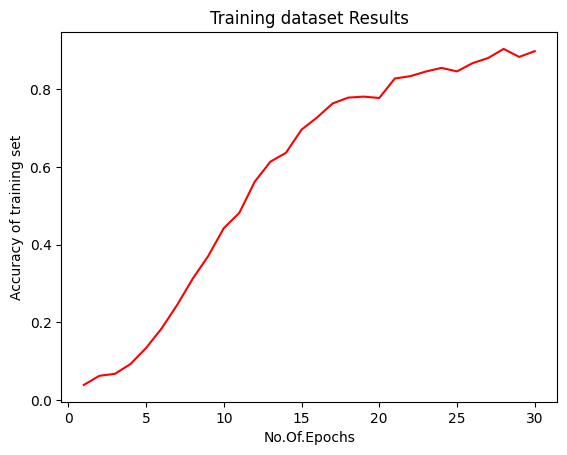

In [21]:
epochs = [i for i in range(1,31)]
plt.plot(epochs, training_history.history['accuracy'], color = "red")
plt.xlabel("No.Of.Epochs")
plt.ylabel("Accuracy of training set")
plt.title("Training dataset Results")
plt.show()

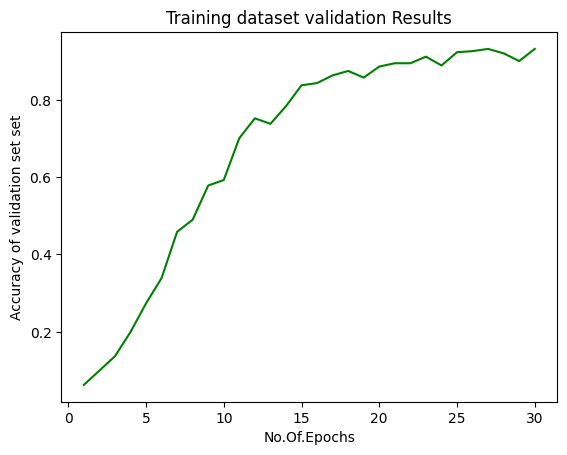

In [22]:
epochs = [i for i in range(1,31)]
plt.plot(epochs, training_history.history['val_accuracy'], color = "green")
plt.xlabel("No.Of.Epochs")
plt.ylabel("Accuracy of validation set set")
plt.title("Training dataset validation Results")
plt.show()

In [2]:
drive.flush_and_unmount()